In [110]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from dt_apriltags import Detector

In [111]:
img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)

In [112]:
img_width = img.shape[0]
img_height = img.shape[1]
at_detector = Detector(families='tag36h11',
                       nthreads=2,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)

In [113]:
fx = 1060.7
fy = 1060.7

tags = at_detector.detect(img, estimate_tag_pose=True, camera_params=[fx, fy, img_height/2, img_width/2], tag_size=0.1)

In [114]:
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

In [115]:
def calc_rel_horizontal_angle(tag):
    x = tag.center[0]
    rel_x = (x - img.shape[1]/2)
    return (np.degrees(np.arctan(rel_x/fx)))

def calc_rel_vertical_angle(tag):
    y = tag.center[1]
    rel_y = (y - img.shape[0]/2)
    return (np.degrees(np.arctan(rel_y/fy)))

def calc_distance_away(tag):
    return (np.linalg.norm(tag.pose_t))

TAG ID: 60 
 X ANGLE: -9.073631730429746 
 Y ANGLE: -7.533373968531265
 DISTANCE: 3.8905946734950914
TAG ID: 82 
 X ANGLE: 7.870161749335502 
 Y ANGLE: -8.471315641975133
 DISTANCE: 4.248710639150843
TAG ID: 318 
 X ANGLE: 11.593134055307525 
 Y ANGLE: 7.254877395589051
 DISTANCE: 3.3241619836615444
TAG ID: 328 
 X ANGLE: -0.044278017653264175 
 Y ANGLE: -7.554071557881722
 DISTANCE: 6.020873326421468
TAG ID: 387 
 X ANGLE: -7.552894199142593 
 Y ANGLE: 4.4281622847725925
 DISTANCE: 3.546620610616648


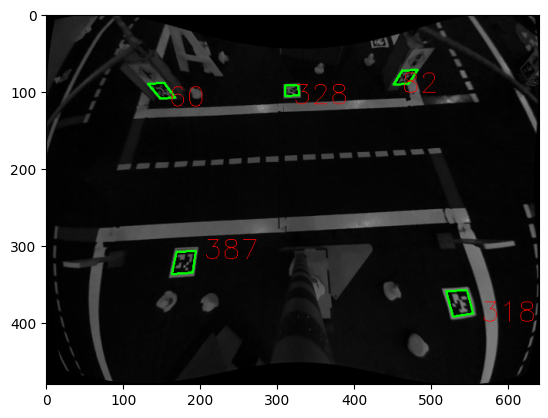

In [116]:
for tag in tags:
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0), 2)

    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=1.2,
                color=(255, 0, 0))
    print (f"TAG ID: {tag.tag_id} \n X ANGLE: {calc_rel_horizontal_angle(tag)} \n Y ANGLE: {calc_rel_vertical_angle(tag)}\n DISTANCE: {calc_distance_away(tag)}")

plt.imshow(color_img)